In [44]:
from datasets import load_dataset
import pandas as pd
import numpy as np

bless = load_dataset("relbert/lexical_relation_classification", "BLESS")
cogA = load_dataset("relbert/lexical_relation_classification", "CogALexV")
Eval = load_dataset("relbert/lexical_relation_classification", "EVALution")
KHN = load_dataset("relbert/lexical_relation_classification", "K&H+N")
Root = load_dataset("relbert/lexical_relation_classification", "ROOT09")

data_dir = "../datasets"

# Sampling and manual annotate

In [45]:
annotate_dict = {1: "disjoint", 2: "independent", 3: "reverseentailment", 4: "forwardentailment", 5: "disjoint", 6: "synonym"}

In [46]:
bless_train = bless["train"].to_pandas()
bless_test = bless["test"].to_pandas()
bless_val = bless["validation"].to_pandas()

In [47]:
manual_label = bless_train.groupby("relation").sample(10, random_state=42)

copy_rel = manual_label.drop("relation", axis=1)
copy_rel = copy_rel.sample(frac=1, random_state=42)
# copy_rel["anno"] = ""
# copy_rel.to_csv("test/anno_bless.csv")
# ------------
copy_rel = pd.read_csv(f"{data_dir}/hand_annotated/bless_anno.csv", index_col=0)
copy_rel["anno"].replace(annotate_dict, inplace=True)
merged = manual_label.merge(copy_rel, left_on=['head', 'tail'], right_on=['head', 'tail'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    # display(merged.drop('relation', axis=1).sample(frac=1, random_state=42))
    # display(merged)
    pass
merged.groupby("relation")["anno"].value_counts()



relation  anno             
attri     independent          10
coord     disjoint             10
event     independent           9
          forwardentailment     1
hyper     forwardentailment     8
          disjoint              1
          independent           1
mero      independent          10
random    independent           7
          disjoint              3
Name: count, dtype: int64

In [48]:
# disjoint, forwardentailment, reverseentailment, independent, alternation, synonym
bless_relation_dict = {
    "attri":"independent",
    "coord":"disjoint",
    "event":"independent",
    "hyper":"forwardentailment",
    "mero":"independent",
    "random": "independent",
    }
                       

for i in [bless_train, bless_test, bless_val]:
    i.name = "bless" 
    i_lower = i["relation"].str.lower()
    i["relation_new"] = i_lower.replace(bless_relation_dict)

# lower to 7.5k
select_idx = np.where(bless_train["relation_new"] == "independent")[0]
split_amount = 5000
frac_amount = 1 if split_amount > len(select_idx) else 1 - split_amount/len(select_idx)

for i in [bless_train, bless_test, bless_val]:
    sample_disjoint = i.loc[np.where(i["relation_new"] == "independent")[0]].sample(frac=frac_amount, random_state=42).index
    i.drop(sample_disjoint, inplace=True)
    
bless_train["relation_new"].value_counts()

relation_new
independent          5000
disjoint             2529
forwardentailment     924
Name: count, dtype: int64

# Sampling COG

In [49]:
cogA_train = cogA["train"].to_pandas()
cogA_test = cogA["test"].to_pandas()


In [50]:
manual_label = cogA_train.groupby("relation").sample(10, random_state=42)

copy_rel = manual_label.drop("relation", axis=1)
copy_rel = copy_rel.sample(frac=1, random_state=42)
# copy_rel["anno"] = ""
# copy_rel.to_csv("test/anno_cog.csv")
# ------------
copy_rel = pd.read_csv(f"{data_dir}/hand_annotated/anno_cog.csv", index_col=0)
copy_rel["anno"].replace(annotate_dict, inplace=True)
merged = manual_label.merge(copy_rel, left_on=['head', 'tail'], right_on=['head', 'tail'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    # display(merged.drop('relation', axis=1).sample(frac=1, random_state=42))
    # display(merged)
    pass
merged.groupby("relation")["anno"].value_counts()


relation  anno             
ANT       disjoint             10
HYPER     forwardentailment     8
          independent           1
          synonym               1
PART_OF   independent           7
          disjoint              2
          reverseentailment     1
RANDOM    disjoint              6
          independent           4
SYN       synonym               9
          forwardentailment     1
Name: count, dtype: int64

In [51]:
coga_relation_dict = {
    "ant": "disjoint",
    "hyper":"forwardentailment",
    "part_of": "independent",
    "random": "disjoint", 
    "syn": "synonym",
    }

for i in [cogA_train, cogA_test]:
    i.name = "cog"
    i_lower = i["relation"].str.lower()
    i["relation_new"] = i_lower.replace(coga_relation_dict)
cogA_train["relation_new"].value_counts()

relation_new
disjoint             2469
forwardentailment     255
synonym               167
independent           163
Name: count, dtype: int64

# REL eval

In [52]:
eval_train = Eval["train"].to_pandas()
eval_test = Eval["test"].to_pandas()
eval_val = Eval["validation"].to_pandas()


In [53]:
manual_label = eval_train.groupby("relation").sample(10, random_state=42)

copy_rel = manual_label.drop("relation", axis=1)
copy_rel = copy_rel.sample(frac=1, random_state=42)
# copy_rel["anno"] = ""
# copy_rel.to_csv("test/anno_eval.csv")
# ------------
copy_rel = pd.read_csv(f"{data_dir}/hand_annotated/anno_eval.csv", index_col=0)
copy_rel["anno"].replace(annotate_dict, inplace=True)
merged = manual_label.merge(copy_rel, left_on=['head', 'tail'], right_on=['head', 'tail'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    # display(merged.drop('relation', axis=1).sample(frac=1, random_state=42))
    # display(merged)
    pass
merged.groupby("relation")["anno"].value_counts()


relation     anno             
Antonym      disjoint              7
             independent           2
             reverseentailment     1
HasA         independent           8
             reverseentailment     1
             disjoint              1
HasProperty  independent           8
             forwardentailment     1
             reverseentailment     1
IsA          independent           4
             disjoint              3
             forwardentailment     2
             synonym               1
MadeOf       independent          10
PartOf       independent           7
             disjoint              2
             forwardentailment     1
Synonym      synonym               5
             independent           4
             forwardentailment     1
Name: count, dtype: int64

In [54]:
eval_relation_dict = {
    "antonym": "disjoint",
    "hasa": "independent",
    "hasproperty": "independent",
    "isa": "independent",
    "madeof": "independent",
    "partof": "independent",
    "synonym": "synonym",
    }

for i in [eval_train, eval_test, eval_val]:
    i.name = "eval"
    # i.drop(np.where(i["relation"].str.lower() == "antonym")[0], inplace=True)
    i.drop(np.where(i["relation"].str.lower() == "isa")[0], inplace=True)
    i_lower = i["relation"].str.lower()
    i["relation_new"] = i_lower.replace(eval_relation_dict)
    
eval_train["relation_new"].value_counts()

relation_new
independent    1979
disjoint       1095
synonym         759
Name: count, dtype: int64

# KHN

In [55]:
KHN_train = KHN["train"].to_pandas()
KHN_test = KHN["test"].to_pandas()
KHN_val = KHN["validation"].to_pandas()


In [56]:
manual_label = KHN_train.groupby("relation").sample(10, random_state=42)

copy_rel = manual_label.drop("relation", axis=1)
copy_rel = copy_rel.sample(frac=1, random_state=42)
# copy_rel["anno"] = ""
# copy_rel.to_csv("test/anno_KHN.csv")
# ------------
copy_rel = pd.read_csv(f"{data_dir}/hand_annotated/anno_KHN.csv", index_col=0)
copy_rel["anno"].replace(annotate_dict, inplace=True)
merged = manual_label.merge(copy_rel, left_on=['head', 'tail'], right_on=['head', 'tail'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    # display(merged.drop('relation', axis=1).sample(frac=1, random_state=42))
    # display(merged)
    pass
merged.groupby("relation")["anno"].value_counts()


relation  anno             
false     disjoint             10
hypo      forwardentailment    10
mero      disjoint              9
          independent           1
sibl      disjoint             10
Name: count, dtype: int64

In [57]:
khn_relation_dict = {
    "false": "disjoint",
    "hypo": "forwardentailment",
    "mero": "disjoint",
    "sibl": "disjoint",
    }


for i in [KHN_train, KHN_test, KHN_val]:
    i.name = "khn"
    i_lower = i["relation"].str.lower()
    i["relation_new"] = i_lower.replace(khn_relation_dict)


# lower to 7.5k
select_idx = np.where(KHN_train["relation_new"] == "disjoint")[0]
split_amount = 5000
frac_amount = 1 if split_amount > len(select_idx) else 1 - split_amount/len(select_idx)
print(frac_amount)

for i in [KHN_train, KHN_test, KHN_val]:
    # lower to 7.5k
    sample_disjoint = i.loc[np.where(i["relation_new"] == "disjoint")[0]].sample(frac=frac_amount, random_state=42).index
    i.drop(sample_disjoint, inplace=True)
    
print(KHN_train["relation_new"].value_counts())




0.8656202967103849
relation_new
disjoint             5000
forwardentailment    3048
Name: count, dtype: int64


# rel ROOT

In [58]:
root_train = Root["train"].to_pandas()
root_test = Root["test"].to_pandas()
root_val = Root["validation"].to_pandas()

In [59]:
manual_label = root_train.groupby("relation").sample(10, random_state=42)

copy_rel = manual_label.drop("relation", axis=1)
copy_rel = copy_rel.sample(frac=1, random_state=42)
# copy_rel["anno"] = ""
# copy_rel.to_csv("test/anno_root.csv")
# ------------
copy_rel = pd.read_csv(f"{data_dir}/hand_annotated/anno_root.csv", index_col=0)
copy_rel["anno"].replace(annotate_dict, inplace=True)
merged = manual_label.merge(copy_rel, left_on=['head', 'tail'], right_on=['head', 'tail'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 10):
    # display(merged.drop('relation', axis=1).sample(frac=1, random_state=42))
    # display(merged)
    pass
merged.groupby("relation")["anno"].value_counts()

relation  anno             
COORD     disjoint             9
          independent          1
HYPER     forwardentailment    5
          independent          3
          disjoint             1
          synonym              1
RANDOM    disjoint             8
          independent          2
Name: count, dtype: int64

In [60]:
root_relation_dict = {
    "coord": "disjoint",
    "hyper": "forwardentailment",
    "random": "disjoint",
    }

for i in [root_train, root_test, root_val]:
    i.name = "root"
    i_lower = i["relation"].str.lower()
    i["relation_new"] = i_lower.replace(root_relation_dict)

    # remove disjoint
    i.drop(np.where(i["relation_new"] == "disjoint")[0], inplace=True)
root_train["relation_new"].value_counts()

relation_new
forwardentailment    2232
Name: count, dtype: int64

In [61]:
train = [bless_train, cogA_train, eval_train, KHN_train, root_train]
test = [bless_test, cogA_test, eval_test, KHN_test, root_test]
val = [bless_val, eval_val, KHN_val, root_val]

train = [bless_train, cogA_train, eval_train, KHN_train, root_train]
test = [bless_test, cogA_test, eval_test, KHN_test, root_test]
val = [bless_val, eval_val, KHN_val, root_val]

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
bless_train

,head,tail,relation,relation_new
1,bottle,contain,event,independent
4,mackerel,retire,random,independent
5,penguin,inhabit,event,independent
6,spoon,libertarianism,random,independent
7,peach,lemon,coord,disjoint
...,...,...,...,...
18575,spinach,food,hyper,forwardentailment
18576,cannon,ball,mero,independent
18577,hawk,lay,event,independent
18578,rat,goat,coord,disjoint


In [69]:

from copy import deepcopy
import os

seed = 1

def fix_data(inp_df, data_name, txt="", print_debug=True):
    import numpy as np
    rng = np.random.default_rng(seed=42)

    os.makedirs(f"../datasets/{data_name}", exist_ok=True)    
    
    together = pd.DataFrame(columns=["head", "tail", "relation"])
    for counter, x in enumerate(inp_df):
        x["meta"] = x["relation"].apply(lambda a: f"{x.name} | {a}")
        x_copy = deepcopy(x)
        
        # ----------- add both directions
        x_copy[["head", "tail"]] = x_copy[["tail", "head"]]
        x_copy["relation_new"] = x_copy["relation_new"].replace("forwardentailment", "reverseentailment")
        # ------------
        together = pd.concat([together, x, x_copy], join="outer")

    together.drop_duplicates(inplace=True, subset=["head", "tail"])
    together.reset_index(drop=True, inplace=True)

    if print_debug:
        print(together["relation_new"].value_counts())

    # FIXME
    
    clean = together.sample(frac=1, random_state=0).reset_index(drop=True)
    clean.replace("null", "Null", inplace=True)
    clean.drop(["relation"], axis=1, inplace=True)
    clean.drop_duplicates(inplace=True)
    clean.reset_index(drop=True, inplace=True)
    clean.to_csv(f"{data_dir}/{data_name}/{txt}.tsv", index = False, header=None, sep="\t")
    
    return together
   

In [71]:
train_big = fix_data(train, "merged_LRC_words", "train")
print("---" * 10)
val_big = fix_data(val, "merged_LRC_words", "validation")
print("---" * 10)
test_big = fix_data(test, "merged_LRC_words", "test")

# # ABALATION
# for i in ["bless", "cog", "eval", "root", "khn"]:
#     train_new = filter(lambda data: data.name != i, train)
#     test_new = filter(lambda data: data.name != i, test)
#     val_new = filter(lambda data: data.name != i, val)

#     train_big = fix_data(train_new, f"ABALATION/{i}", "train", print_debug=False)
#     val_big = fix_data(val_new, f"ABALATION/{i}", "validation", print_debug=False)
#     test_big = fix_data(test_new, f"ABALATION/{i}", "test", print_debug=False)


relation_new
disjoint             20251
independent          13637
forwardentailment     5541
reverseentailment     5539
synonym               1521
Name: count, dtype: int64
------------------------------
relation_new
disjoint             1196
independent          1006
forwardentailment     413
reverseentailment     413
synonym               100
Name: count, dtype: int64
------------------------------
relation_new
disjoint             12599
independent           5207
forwardentailment     2395
reverseentailment     2385
synonym                875
Name: count, dtype: int64


In [ ]:
train_big

,head,tail,relation,relation_new,meta
0,bottle,contain,event,independent,bless | event
1,mackerel,retire,random,independent,bless | random
2,penguin,inhabit,event,independent,bless | event
3,spoon,libertarianism,random,independent,bless | random
4,peach,lemon,coord,disjoint,bless | coord
...,...,...,...,...,...
46484,improve,hone,HYPER,reverseentailment,root | HYPER
46485,kid,girl,HYPER,reverseentailment,root | HYPER
46486,travel,drive,HYPER,reverseentailment,root | HYPER
46487,communication,assertion,HYPER,reverseentailment,root | HYPER


In [ ]:
print(train_big["relation_new"].value_counts(normalize=True))
print("---" * 10)
print(test_big["relation_new"].value_counts(normalize=True))
print("---" * 10)
print(val_big["relation_new"].value_counts(normalize=True))

relation_new
independent          0.438757
disjoint             0.338438
forwardentailment    0.086966
reverseentailment    0.086902
synonym              0.048937
Name: proportion, dtype: float64
------------------------------
relation_new
disjoint             0.506061
independent          0.290878
forwardentailment    0.077370
reverseentailment    0.076811
synonym              0.048880
Name: proportion, dtype: float64
------------------------------
relation_new
independent          0.500000
disjoint             0.239563
forwardentailment    0.105368
reverseentailment    0.105368
synonym              0.049702
Name: proportion, dtype: float64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

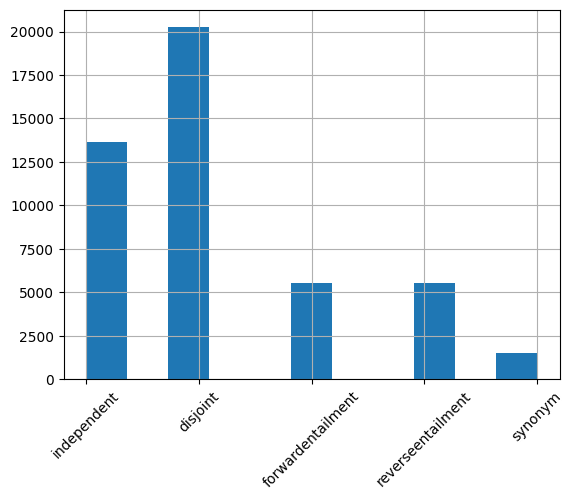

In [ ]:
train_big["relation_new"].hist(xrot=45, bins=11)

<Axes: >

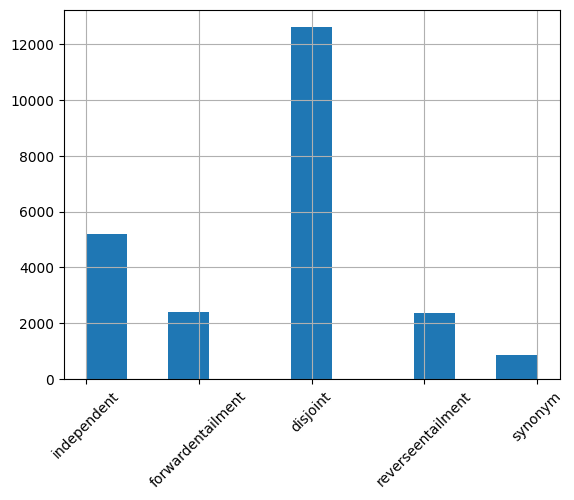

In [ ]:
test_big["relation_new"].hist(xrot=45, bins=11)

<Axes: >

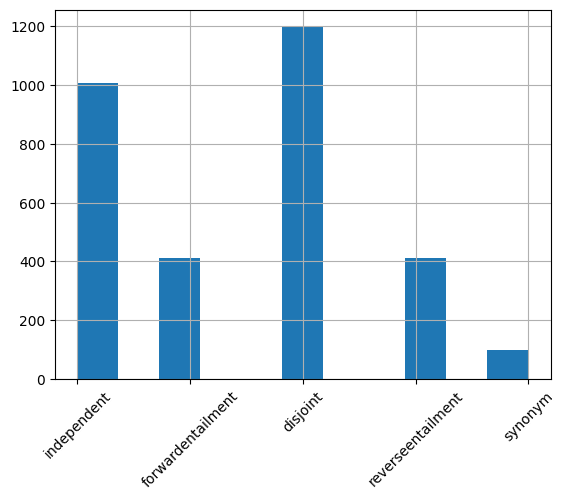

In [ ]:
val_big["relation_new"].hist(xrot=45, bins=11)

In [ ]:
merge_all = pd.concat([train_big, test_big, val_big], join="outer")
merge_all

,head,tail,relation,relation_new,meta
0,bottle,contain,event,independent,bless | event
1,mackerel,retire,random,independent,bless | random
2,penguin,inhabit,event,independent,bless | event
3,spoon,libertarianism,random,independent,bless | random
4,peach,lemon,coord,disjoint,bless | coord
...,...,...,...,...,...
3123,fun,play,HYPER,reverseentailment,root | HYPER
3124,needed,indispensable,HYPER,reverseentailment,root | HYPER
3125,hit,bat,HYPER,reverseentailment,root | HYPER
3126,cover,jacket,HYPER,reverseentailment,root | HYPER


In [ ]:
merge_all.drop_duplicates(inplace=True)
merge_all.reset_index(drop=True, inplace=True)
merge_all

,head,tail,relation,relation_new,meta
0,bottle,contain,event,independent,bless | event
1,mackerel,retire,random,independent,bless | random
2,penguin,inhabit,event,independent,bless | event
3,spoon,libertarianism,random,independent,bless | random
4,peach,lemon,coord,disjoint,bless | coord
...,...,...,...,...,...
71710,fun,play,HYPER,reverseentailment,root | HYPER
71711,needed,indispensable,HYPER,reverseentailment,root | HYPER
71712,hit,bat,HYPER,reverseentailment,root | HYPER
71713,cover,jacket,HYPER,reverseentailment,root | HYPER


<Axes: >

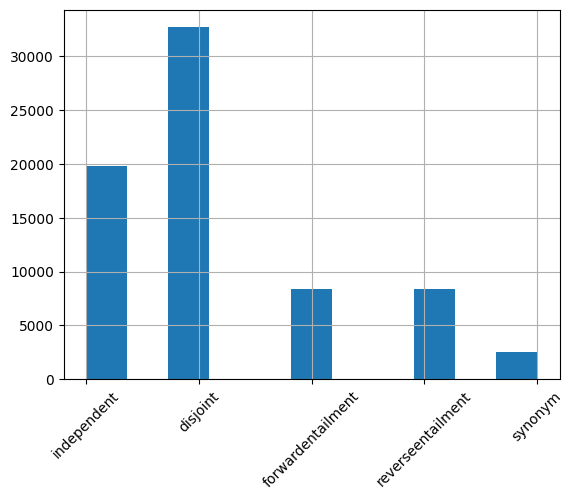

In [ ]:
merge_all["relation_new"].hist(xrot=45, bins=11)

In [ ]:
merge_all["relation_new"].value_counts(normalize=True)

relation_new
disjoint             0.455985
independent          0.276734
forwardentailment    0.116391
reverseentailment    0.116224
synonym              0.034665
Name: proportion, dtype: float64

In [ ]:
merge_all["relation_new"].value_counts()

relation_new
disjoint             32701
independent          19846
forwardentailment     8347
reverseentailment     8335
synonym               2486
Name: count, dtype: int64

In [ ]:
round(merge_all["meta"].value_counts(normalize=True) * 100, 2)

meta
cog | RANDOM          14.69
khn | hypo            11.44
bless | random        11.14
khn | false           10.02
khn | sibl             8.80
bless | coord          6.38
root | HYPER           6.38
bless | hyper          3.69
eval | Antonym         3.65
eval | HasProperty     3.47
bless | event          3.45
bless | mero           2.76
bless | attri          2.54
eval | Synonym         2.38
cog | HYPER            1.75
cog | ANT              1.66
eval | HasA            1.28
eval | PartOf          1.20
cog | SYN              1.08
cog | PART_OF          1.05
eval | MadeOf          0.78
khn | mero             0.39
Name: proportion, dtype: float64